In [3]:
import pandas as pd
import numpy as np
import re
import os
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
info = pd.read_csv('../data/sorted_new.csv', index_col=0)
results = pd.read_csv('../data/sorted_new_goemotion_predictions.csv', index_col=0)

In [5]:
info

,ConversationId,ConversationInitiated,ConversationDate,ConversationEndedBy,Id,Initiated,Text,ParticipantId,ParticipantRole,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,Patrol,script
0,5c2d2042f92dde6e0d623bc5,1546461250000,2019-01-02 20:34:10,SYSTEM,5c2d2042f92dde6e0d623bc7,2019-01-02 20:34:10,U tell me im junior,7605202845,Visitor,43209078.0,43209078.0,True,NaN,U tell me im junior,NaN,False
1,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee93e3e1b9890052f246c,2019-01-04 05:03:58,Hi,8168241807,Visitor,29072.0,29072.0,True,29072.0,Hi,ABOG Anchorage,False
2,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2ee95b3e1b9890052f247b,2019-01-04 05:04:27,hey :) how r u?,DQVCTWMS5aaaaN,Agent,NaN,611946.0,True,NaN,hey :) how r u?,ABOG Anchorage,False
3,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebbf3e1b9890052f28e1,2019-01-04 05:14:39,still there?,DQVCTWMS5aaaaN,Agent,NaN,45298.0,True,NaN,still there?,ABOG Anchorage,False
4,5c2ee93e3e1b9890052f246a,1546578238531,2019-01-04 05:03:58,SYSTEM,5c2eebec3e1b9890052f291c,2019-01-04 05:15:24,Hi,8168241807,Visitor,NaN,12214.0,True,12214.0,Hi,ABOG Anchorage,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153985,600f6a41c3fb5c1743252001,1611622977245,2021-01-26 01:02:57,SYSTEM,600f6a4fc3fb5c174325225a,2021-01-26 01:03:11,call me ;),wFu6TqMy5aa^a3,Agent,NaN,303333.0,True,NaN,call me ;),ABOG North Texas,False
153986,600f6a41c3fb5c1743252001,1611622977245,2021-01-26 01:02:57,SYSTEM,600f6b7ec3fb5c1743254811,2021-01-26 01:08:14,y u hang up?,wFu6TqMy5aa^a3,Agent,NaN,43214049.0,True,NaN,y u hang up?,ABOG North Texas,False
153987,600f6c32c3fb5c1743255e2c,1611623474294,2021-01-26 01:11:14,SYSTEM,600f6c32c3fb5c1743255e2e,2021-01-26 01:11:14,"Hey, how are you doing tonight?",8162102211,Visitor,129146.0,129146.0,True,129146.0,"Hey, how are you doing tonight?",ABOG North Texas,False
153988,600f6c32c3fb5c1743255e2c,1611623474294,2021-01-26 01:11:14,SYSTEM,600f6cb3c3fb5c1743256623,2021-01-26 01:13:23,good call me :),FGV8TqMa5aama!,Agent,NaN,43209929.0,True,NaN,good call me :),ABOG North Texas,False


In [6]:
column = pd.DataFrame({'Patrol': info['Patrol']})

In [7]:
column = column.reset_index(drop= True)

In [8]:
final = column.join(results)

In [9]:
final = final[final["Patrol"].notna()]

In [10]:
final

,Patrol,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
1,ABOG Anchorage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
2,ABOG Anchorage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.953519,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,ABOG Anchorage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.318040,0.405695,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.366795
4,ABOG Anchorage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998637
5,ABOG Anchorage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153984,ABOG North Texas,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984843
153985,ABOG North Texas,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.998641
153986,ABOG North Texas,0.000000,0.0,0.0,0.0,0.000000,0.0,0.528134,0.366136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
153987,ABOG North Texas,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.933803,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481151


In [11]:
final.Patrol.unique()

array(['ABOG Anchorage', 'ABOG Portland', 'ABOG Arizona', 'ABOG Detroit',
       'ABOG Kansas City', 'ABOG San Diego', 'ABOG North Texas',
       'ABOG SeattleTacoma', 'ABOG Houston', 'ABOG Madison',
       'ABOG Bay Area', 'ABOG San Antonio'], dtype=object)

In [12]:
final['Patrol'] = final['Patrol'].str[5:]

In [13]:
vals = dict(final['Patrol'].value_counts())
vals

{'Portland': 34577,
 'Detroit': 25522,
 'Arizona': 22690,
 'Anchorage': 17313,
 'Kansas City': 15443,
 'North Texas': 6422,
 'Madison': 3088,
 'San Diego': 3030,
 'Houston': 2447,
 'Bay Area': 1445,
 'San Antonio': 896,
 'SeattleTacoma': 612}

In [14]:
final = final.replace(to_replace = 'SeattleTacoma' , value= 'Seattle')
final = final.replace(to_replace = 'Kansas City' , value= 'KC')
final = final.replace(to_replace = 'Arizona' , value= 'AZ')

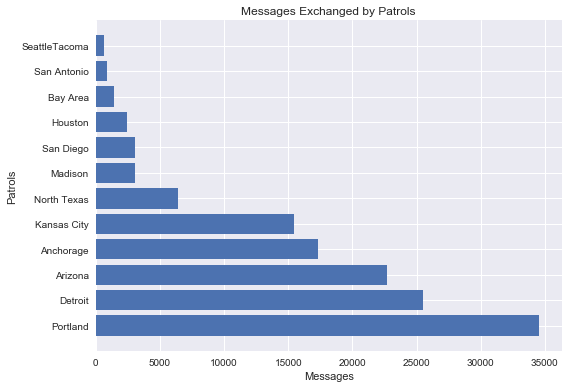

In [15]:
plt.barh(list(vals.keys()), list(vals.values()))
plt.title('Messages Exchanged by Patrols')
plt.xlabel('Messages')
plt.ylabel('Patrols')
plt.tight_layout()
plt.savefig('../graphs/patrol_activity.jpg')

In [16]:
portland = final[final['Patrol'] =='Portland']
detroit = final[final['Patrol'] =='Detroit']
az = final[final['Patrol'] =='AZ']
anchorage = final[final['Patrol'] =='Anchorage']
kc = final[final['Patrol'] =='KC']
north_tx = final[final['Patrol'] =='North Texas']

In [17]:
portland = portland.drop(columns = ['Patrol'])
detroit = detroit.drop(columns = ['Patrol'])
az = az.drop(columns = ['Patrol'])
anchorage = anchorage.drop(columns = ['Patrol'])
kc = kc.drop(columns = ['Patrol'])
north_tx = north_tx.drop(columns = ['Patrol'])
portland = portland.reset_index(drop= True)
detroit = detroit.reset_index(drop= True)
az = az.reset_index(drop= True)
anchorage = anchorage.reset_index(drop= True)
kc = kc.reset_index(drop= True)
north_tx = north_tx.reset_index(drop= True)

In [18]:
madison = final[final['Patrol'] =='Madison']
san_diego = final[final['Patrol'] =='San Diego']
houston = final[final['Patrol'] =='Houston']
bay_area = final[final['Patrol'] =='Bay Area']
san_antonio= final[final['Patrol'] =='San Antonio']
seatle = final[final['Patrol'] =='Seattle']
madison = madison.drop(columns = ['Patrol'])
san_diego = san_diego.drop(columns = ['Patrol'])
houston = houston.drop(columns = ['Patrol'])
bay_area = bay_area.drop(columns = ['Patrol'])
san_antonio = san_antonio.drop(columns = ['Patrol'])
seatle = seatle.drop(columns = ['Patrol'])
madison = madison.reset_index(drop= True)
san_diego = san_diego.reset_index(drop= True)
houston = houston.reset_index(drop= True)
bay_area = bay_area.reset_index(drop= True)
san_antonio = san_antonio.reset_index(drop= True)
seatle = seatle.reset_index(drop= True)

In [19]:
def set_frequency(row) -> int:
    if row > 0:
        return 1
    else:
        return 0

In [20]:
def graph_freq(df,name):
    frequencies = []
    for column in df.columns:
        frequencies.append(sum(df[column].apply(lambda x: set_frequency(x))))
    freq_dict = dict(zip(df.columns, frequencies))
    sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1]))
    plt.barh(list(sorted_freq_dict.keys()), list(sorted_freq_dict.values()))
    plt.title(f'Frequency of Prediction Labels for {name}')
    plt.xlabel('Frequency')
    plt.ylabel('Labels')
    plt.tight_layout()
    plt.savefig(f'../graphs/{name}_freq_pred.jpg')

    
    labels = df.columns
    mean_scores = []
    for label in labels:
        mean_scores.append(df.loc[df[label] > 0, label].mean())
    mean_dict = dict(zip(labels, mean_scores))
    plt.barh(list(mean_dict.keys()), list(mean_dict.values()))
    plt.title(f'Mean Score of Prediction Labels {name}')
    plt.xlabel('Mean Emotion Score')
    plt.ylabel('Labels')
    plt.tight_layout()
    plt.savefig(f'../graphs/{name}_mean_preds.jpg')

In [21]:
def graph_num(df, name):
    df.astype(bool).sum(axis=1).value_counts().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=360)
    plt.title(f'Total Number of Assigned Emotions to Each Row-{name}')
    plt.xlabel('Number of Emotions Assigned')
    plt.ylabel('Counts')
    plt.tight_layout()
    plt.savefig(f'../graphs/{name}_total_preds.jpg')

In [22]:
def graph_mean(df,name):  
    labels = df.columns
    mean_scores = []
    for label in labels:
        mean_scores.append(df.loc[df[label] > 0, label].mean())
    mean_dict = dict(zip(labels, mean_scores))
    sorted_mean_dict= dict(sorted(mean_dict.items(), key=lambda item: item[1]))
    plt.barh(list(sorted_mean_dict.keys()), list(sorted_mean_dict.values()))
    plt.title(f'Mean Score of Prediction Labels {name}')
    plt.xlabel('Mean Emotion Score')
    plt.ylabel('Labels')
    plt.tight_layout()
    plt.savefig(f'../graphs/{name}_mean_preds.jpg')

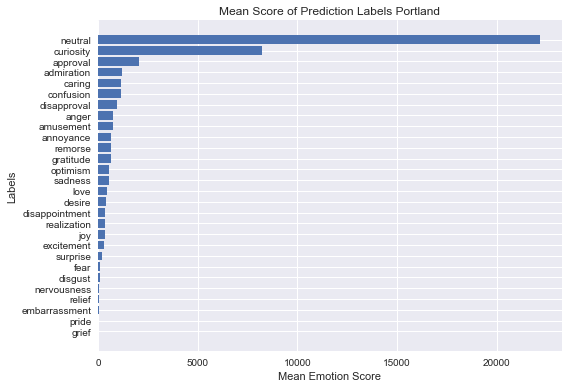

In [154]:
graph_freq(portland,'Portland')

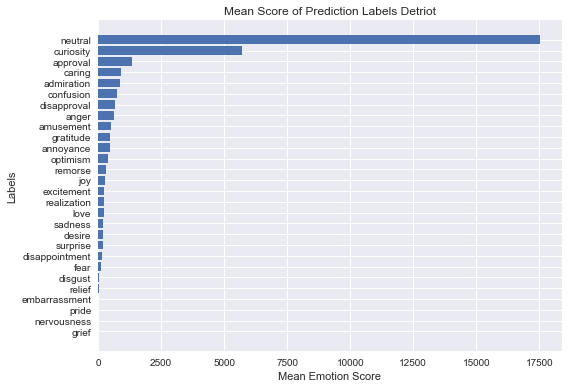

In [155]:
graph_freq(detroit,'Detriot')

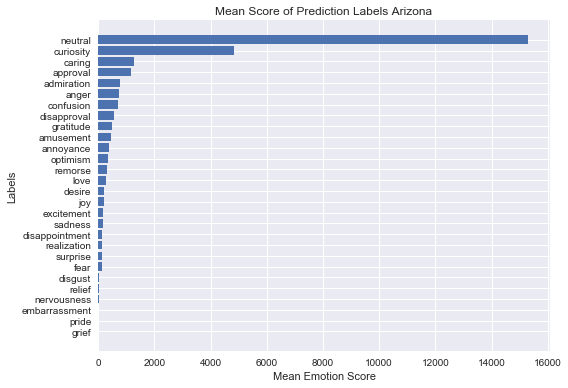

In [156]:
graph_freq(az,'Arizona')

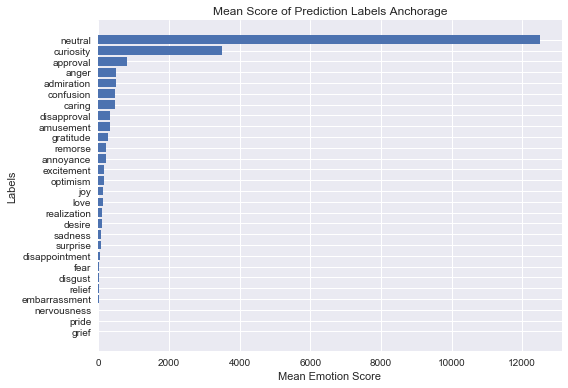

In [157]:
graph_freq(anchorage,'Anchorage')

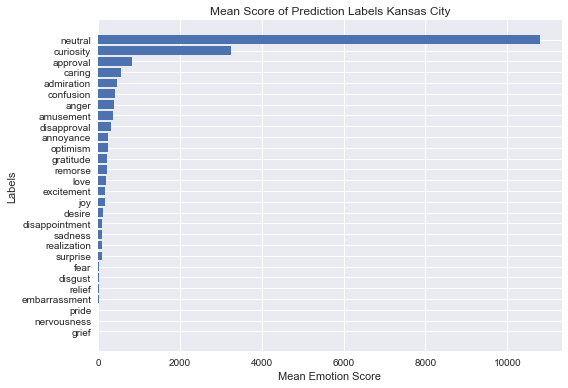

In [159]:
graph_freq(kc,'Kansas City')

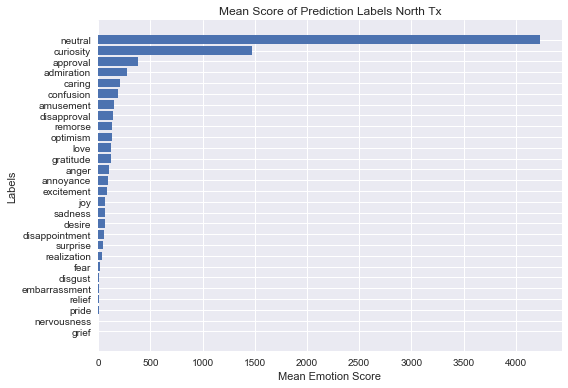

In [160]:
graph_freq(north_tx,'North Tx')

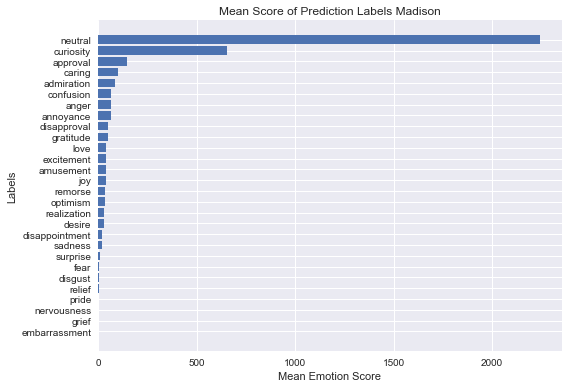

In [161]:
graph_freq(madison,'Madison')

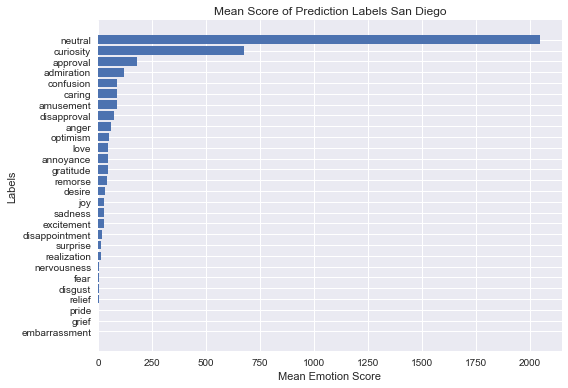

In [162]:
graph_freq(san_diego,'San Diego')

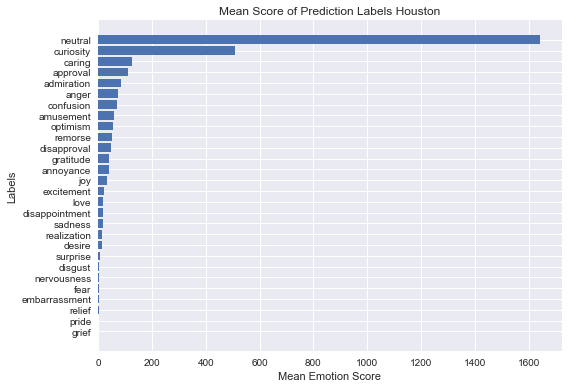

In [163]:
graph_freq(houston,'Houston')

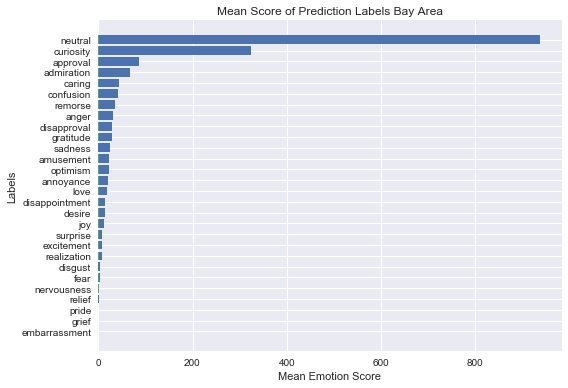

In [164]:
graph_freq(bay_area,'Bay Area')

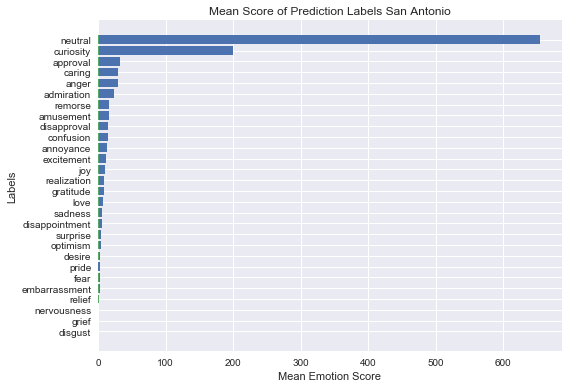

In [165]:
graph_freq(san_antonio,'San Antonio')

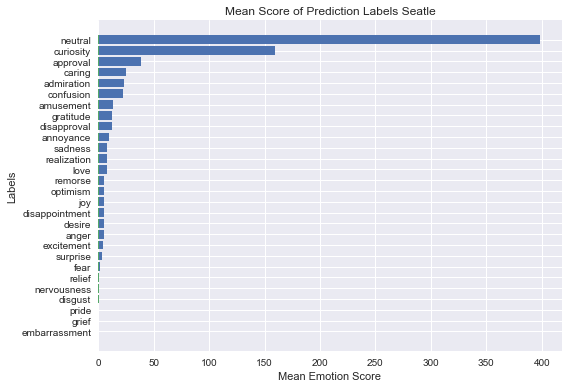

In [166]:
graph_freq(seatle,'Seatle')

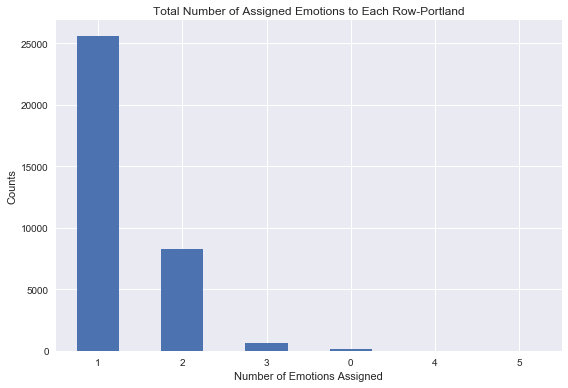

In [167]:
graph_num(portland,'Portland')

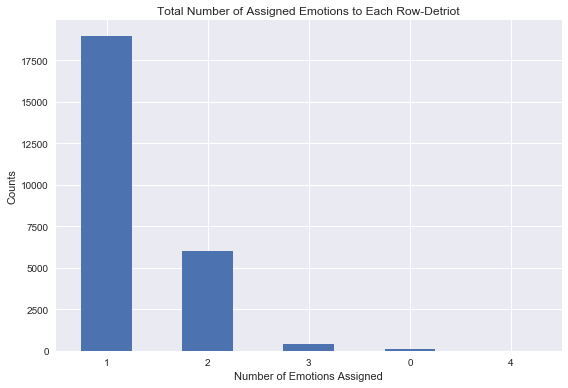

In [168]:
graph_num(detroit,'Detriot')

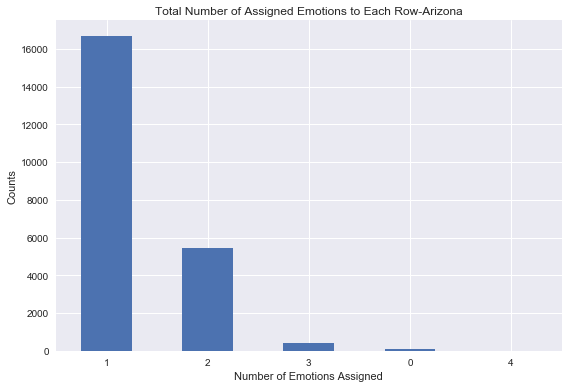

In [169]:
graph_num(az,'Arizona')

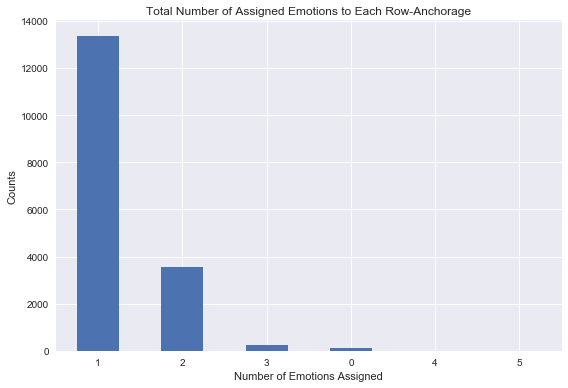

In [170]:
graph_num(anchorage,'Anchorage')

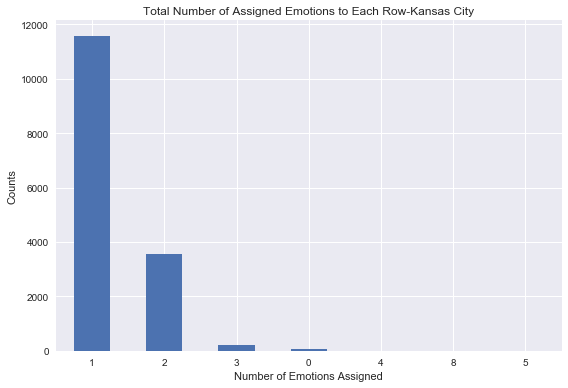

In [171]:
graph_num(kc,'Kansas City')

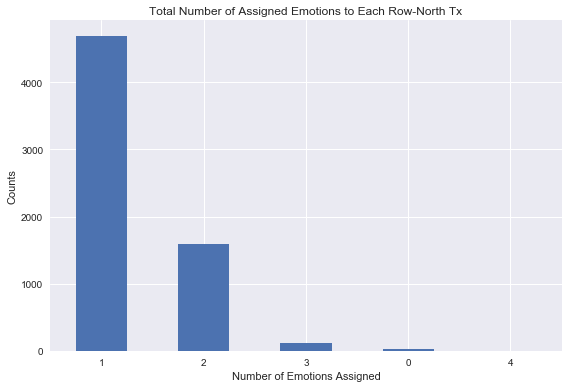

In [172]:
graph_num(north_tx,'North Tx')

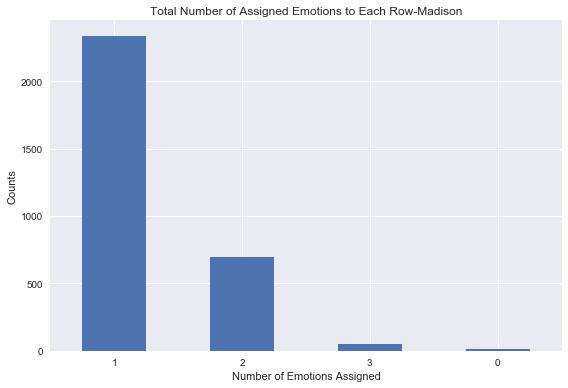

In [173]:
graph_num(madison,'Madison')

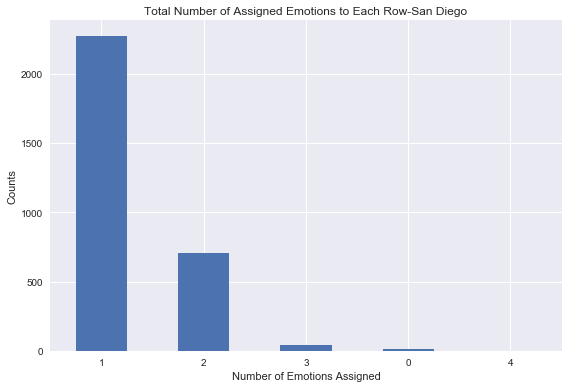

In [174]:
graph_num(san_diego,'San Diego')

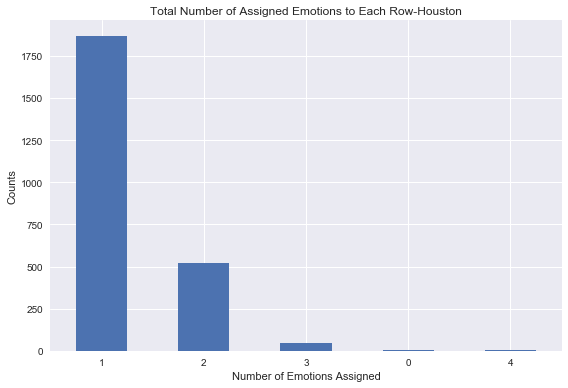

In [175]:
graph_num(houston,'Houston')

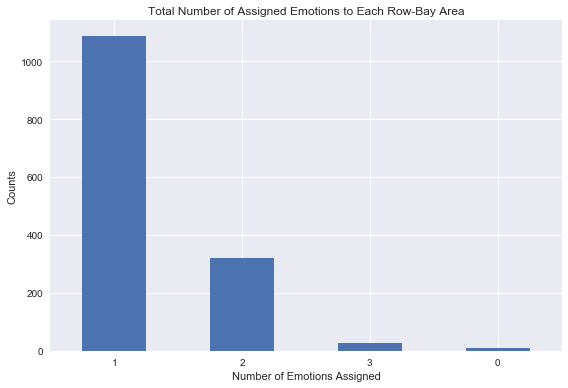

In [176]:
graph_num(bay_area,'Bay Area')

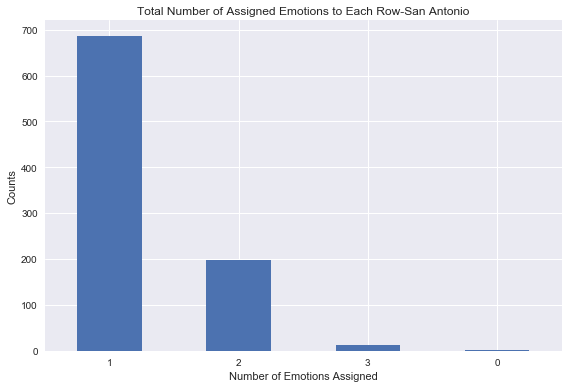

In [177]:
graph_num(san_antonio,'San Antonio')

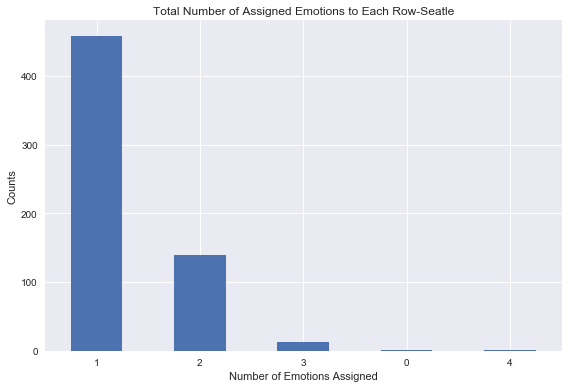

In [178]:
graph_num(seatle,'Seatle')

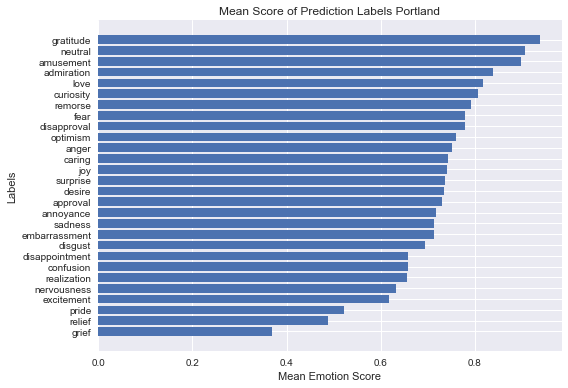

In [148]:
graph_mean(portland,'Portland')

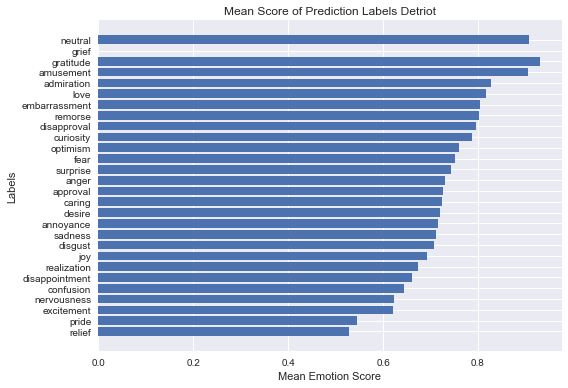

In [179]:
graph_mean(detroit,'Detriot')

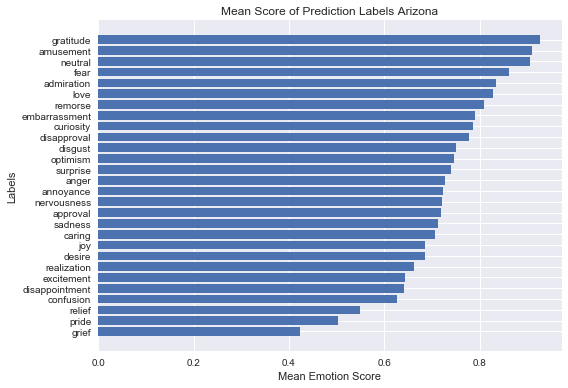

In [180]:
graph_mean(az,'Arizona')

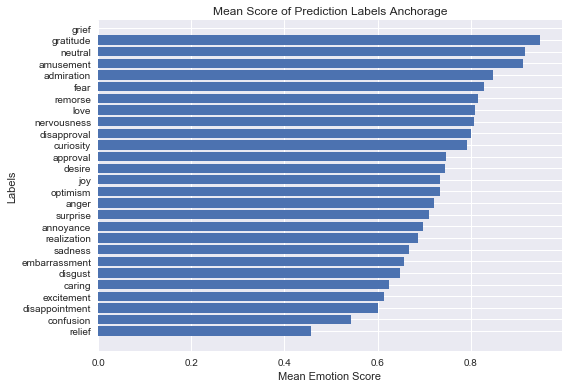

In [181]:
graph_mean(anchorage,'Anchorage')

In [1]:
graph_mean(kc,'Kansas City')

NameError: name 'graph_mean' is not defined

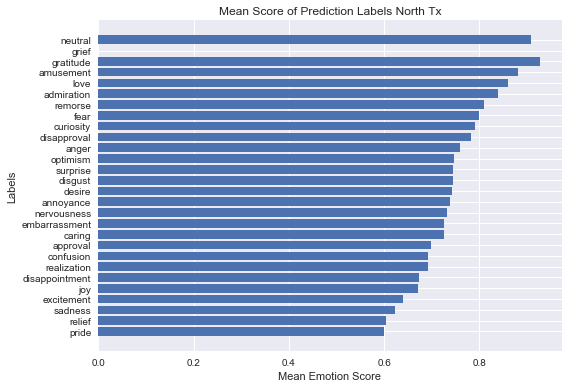

In [183]:
graph_mean(north_tx,'North Tx')

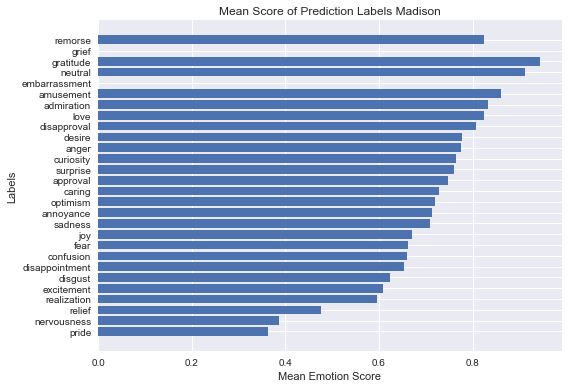

In [23]:
graph_mean(madison,'Madison')

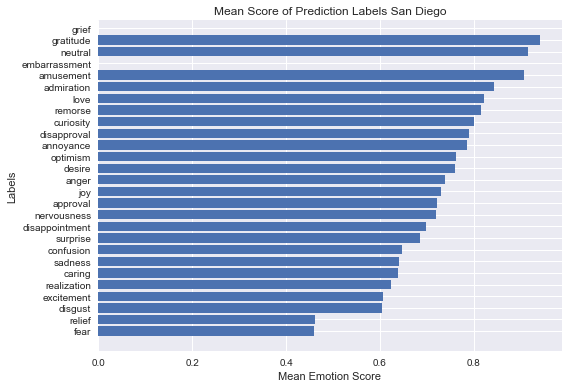

In [185]:
graph_mean(san_diego,'San Diego')

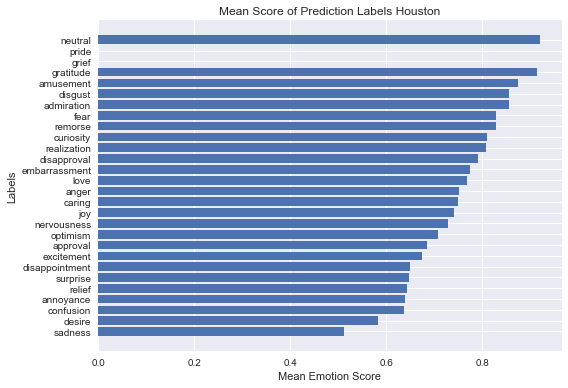

In [186]:
graph_mean(houston,'Houston')

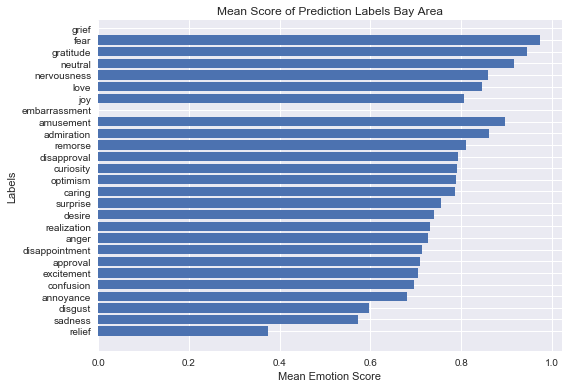

In [187]:
graph_mean(bay_area,'Bay Area')

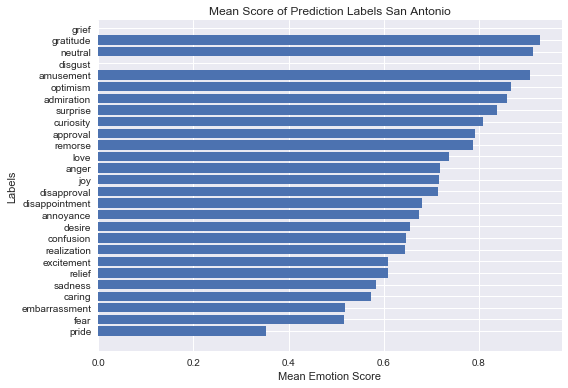

In [188]:
graph_mean(san_antonio,'San Antonio')

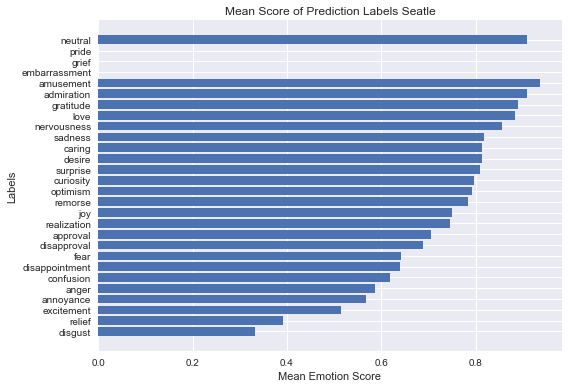

In [189]:
graph_mean(seatle,'Seatle')

In [92]:
scripted= pd.read_csv('../data/script_messages.csv', index_col=0)

In [93]:
scripted['ConversationDate'] = pd.to_datetime(scripted['ConversationDate'])

In [120]:
monthly = dict(scripted.groupby([pd.Grouper(key='ConversationDate', freq='M')]).size())

In [123]:
dates = list(monthly.keys())
dates = [ x.strftime("%m/%Y") for x in dates ]

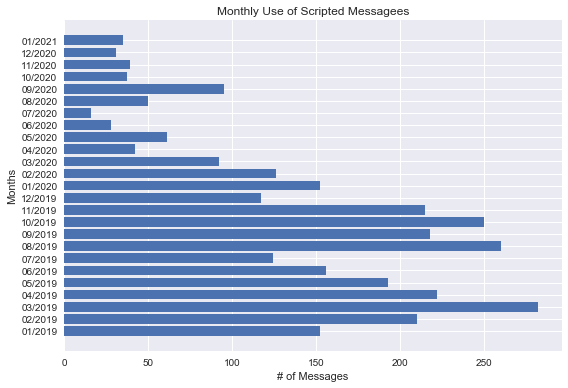

In [126]:
plt.barh(dates, list(monthly.values()))
plt.title('Monthly Use of Scripted Messagees')
plt.xlabel('# of Messages')
plt.ylabel('Months')
plt.tight_layout()
plt.savefig('../graphs/monthly_scripted.jpg')